<a href="https://colab.research.google.com/github/RahulSinghWaldia/EXPENSES/blob/main/Copy_of_EXPENSES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df=pd.read_csv(r"/content/sample_data/Expenses.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.920
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.470
4,32,male,28.880,0,no,northwest,3866.855


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.duplicated().sum()

1

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.563


In [ ]:
df.drop_duplicates(keep="first", inplace=True)

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.000,27.000,39.000,51.00,64.00
bmi,1337.0,30.663452,6.100468,15.960,26.290,30.400,34.70,53.13
children,1337.0,1.095737,1.205571,0.000,0.000,1.000,2.00,5.00
charges,1337.0,13279.121568,12110.359697,1121.874,4746.344,9386.161,16657.72,63770.43


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


**Data Visualization and Analysis **

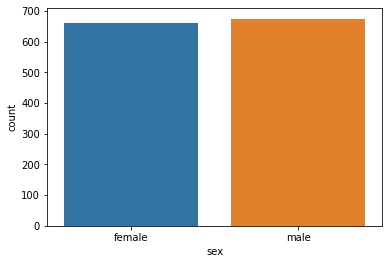

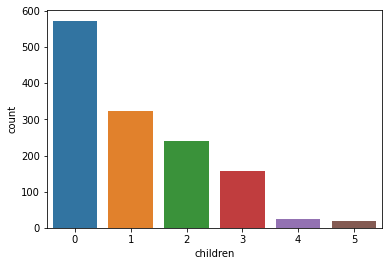

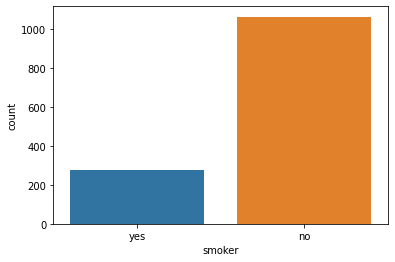

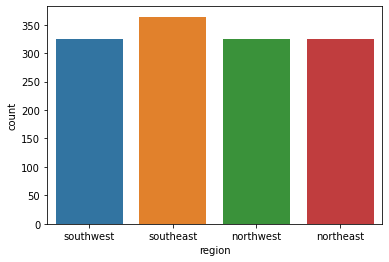

In [ ]:
df_categorical=['sex', 'children', 'smoker', 'region']

for i in df_categorical:
    sns.countplot(data=df, x=i)
    plt.show()

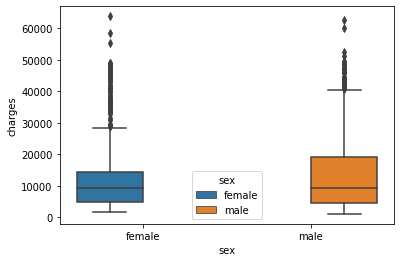

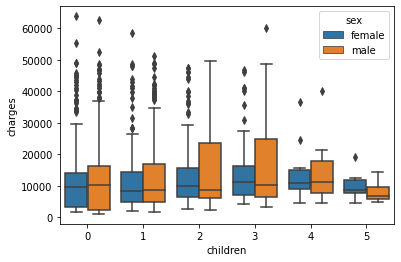

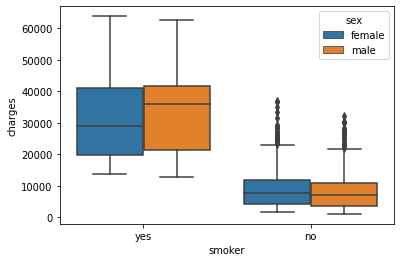

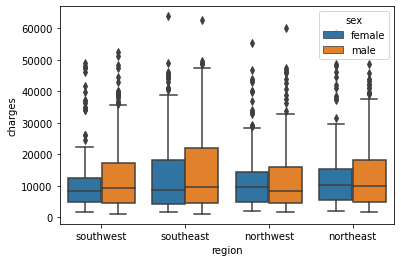

In [ ]:
for i in df_categorical:
    sns.boxplot(x=i, y="charges",hue="sex" ,data=df)
    plt.show()

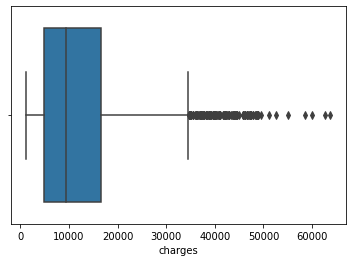

In [ ]:
sns.boxplot(x="charges", data=df)

In [ ]:
df[df["charges"]>55000]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.43
577,31,female,38.095,1,yes,northeast,58571.07
819,33,female,35.530,0,yes,northwest,55135.40
1230,52,male,34.485,3,yes,northwest,60021.40
1300,45,male,30.360,0,yes,southeast,62592.87


In [ ]:
df.sort_values("charges", ascending=False)[:20]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.43
1300,45,male,30.360,0,yes,southeast,62592.87
1230,52,male,34.485,3,yes,northwest,60021.40
577,31,female,38.095,1,yes,northeast,58571.07
819,33,female,35.530,0,yes,northwest,55135.40
1146,60,male,32.800,0,yes,southwest,52590.83
34,28,male,36.400,1,yes,southwest,51194.56
1241,64,male,36.960,2,yes,southeast,49577.66
1062,59,male,41.140,1,yes,southeast,48970.25
488,44,female,38.060,0,yes,southeast,48885.14


**We can easily see that, smoker has highly corr with expenses**

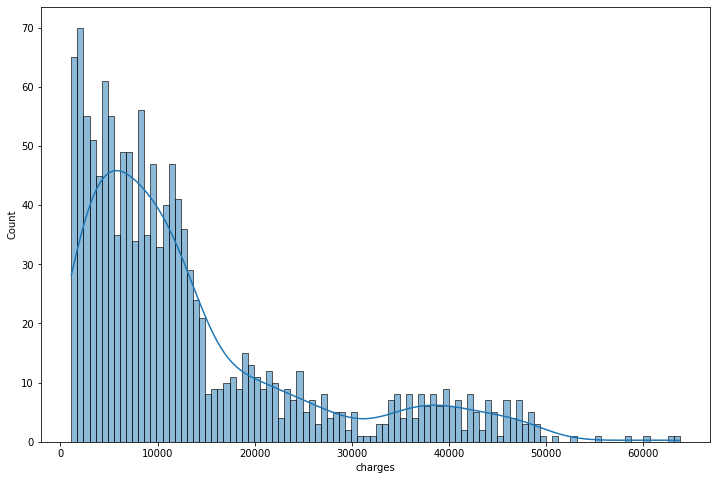

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="charges", bins=100, kde=True)

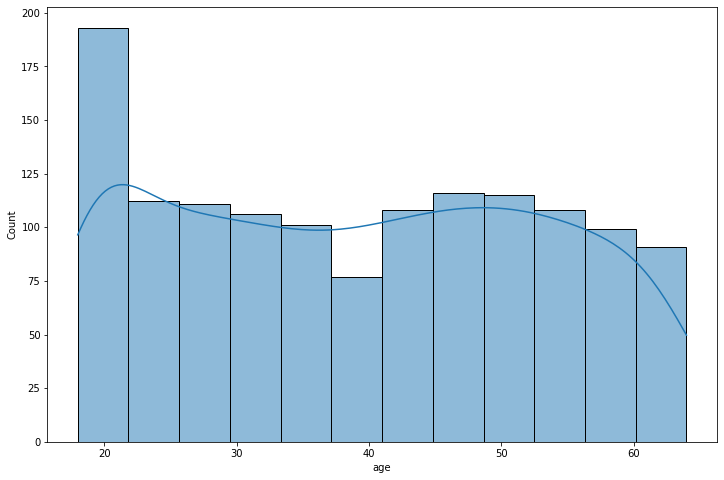

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", kde=True)

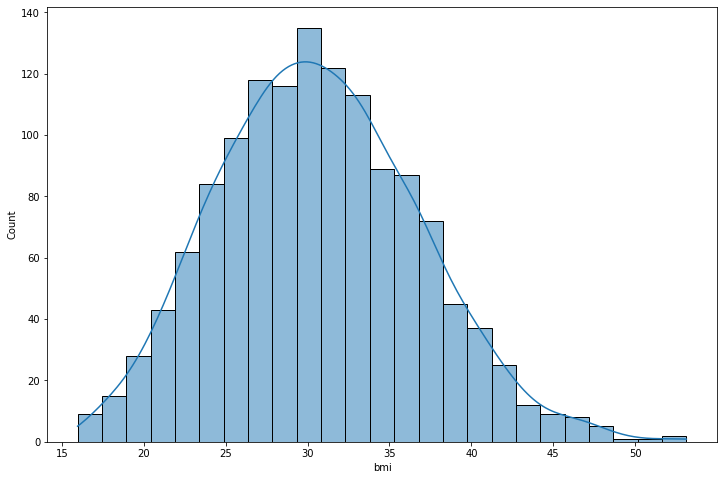

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="bmi", kde=True)

In [ ]:
a=['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for i in a:
    fig=px.histogram(df, x=i, y="charges", color="sex", marginal="violin")
    fig.show()

**According to smoker/sum of expenses graph, sum of expenses are more on non smokers. It's because of the count of people who smoke and who don't smoke.**

In [ ]:
print("Count of people who smoke =",df[df["smoker"]=="yes"].shape[0])
print("Count of people who don't smoke =",df[df["smoker"]=="no"].shape[0])

Count of people who smoke = 274
Count of people who don't smoke = 1063


**The number of non smokers is about 4 times the number of smokers. Despite that, sum of expenses are pretty close**

In [ ]:
df1=df[df["smoker"]=="yes"]
fig=px.scatter(df1,x="age", y="charges", color="sex", trendline="ols",
              title="Smoker")
fig.show()

df2=df[df["smoker"]=="no"]
fig=px.scatter(df2,x="age", y="charges", color="sex", trendline="ols",
              title="Non Smoker")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df1=df[df["smoker"]=="yes"]
fig=px.scatter(df1,x="bmi", y="charges", color="sex", trendline="ols",
              title="Smoker")
fig.show()

df2=df[df["smoker"]=="no"]
fig=px.scatter(df2,x="bmi", y="charges", color="sex", trendline="ols",
              title="Non Smoker")
fig.show()

**Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])

In [ ]:
df1=df.corr()["charges"].reset_index()
fig=px.bar(df1, x="index", y="charges", title="Correlation for Charges")
fig.show()

In [ ]:
x=df.drop(columns=["charges"], axis=1)
y=df.charges

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0)
lr=LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))
y_pred=lr.predict(x_train)
print(mean_absolute_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))

0.7438474559028541
3983.755813068599
5937.9997993555635


In [ ]:
from sklearn import linear_model
reg=linear_model.Ridge(alpha=.5)
reg.fit(x_train, y_train)
y_pred=reg.predict(x_train)
print(mean_absolute_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(reg.score(x_test, y_test))

3988.772895849477
5938.0744906581085
0.7438976234716862


In [ ]:
reg2=linear_model.Lasso()
reg2.fit(x_train, y_train)
y_pred=reg2.predict(x_train)
print(mean_absolute_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(reg2.score(x_test, y_test))

3984.0509502327204
5938.000727513607
0.7438595601294027


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_quad=pf.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_quad, y, random_state=0)
reg3=LinearRegression().fit(x_train,y_train)
y_pred=reg3.predict(x_train)
print(mean_absolute_error(y_train, y_pred))
print(np.sqrt(mean_squared_error(y_train, y_pred)))
print(reg3.score(x_test, y_test))

2721.4566811788595
4650.067910124336
0.838006850841563
